In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
from scipy.spatial import cKDTree

<IPython.core.display.Javascript object>


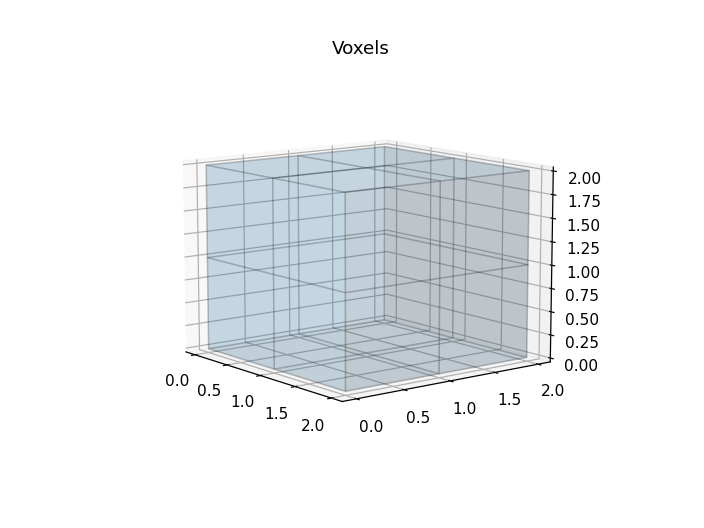

Text(0.5, 0.92, 'Voxels')

In [2]:
%matplotlib notebook
nc = 1
# 3d boolean array 
one = np.ones((nc+1, nc+1, nc+1))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(one, alpha = 0.12, edgecolor="k", shade=True) # Voxel visualization
ax.set_title('Voxels')

<IPython.core.display.Javascript object>


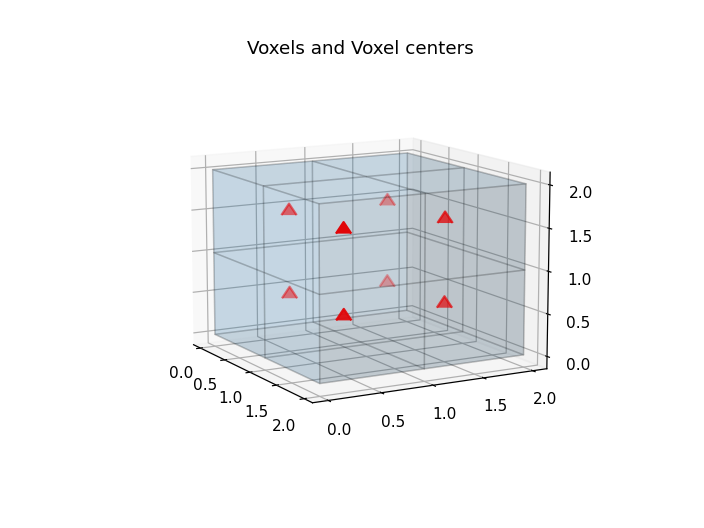

Text(0.5, 0.92, 'Voxels and Voxel centers')

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
xc = np.arange(1, nc+2) - .5 
yc = np.arange(1, nc+2) - .5 
zc = np.arange(1, nc+2) - .5 
xc_, yc_, zc_ = np.meshgrid(xc, yc, zc)
ax.scatter(xc_.ravel(), yc_.ravel(), zc_.ravel(), marker = 10, c = 'r', s = 100) # Voxel Centers
ax.voxels(one, alpha = 0.12, edgecolor="k", shade=True) # Voxels
ax.set_title('Voxels and Voxel centers')

<IPython.core.display.Javascript object>


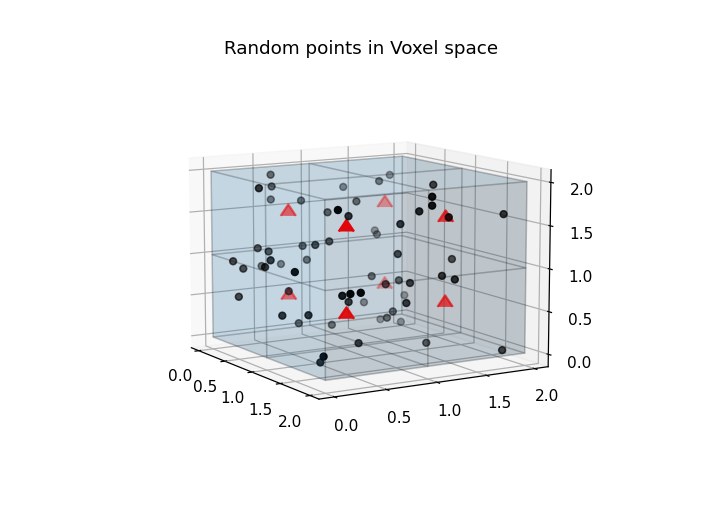

Text(0.5, 0.92, 'Random points in Voxel space')

In [4]:
x = np.random.randint((nc+1)*10, size = (nc+3, nc+3, nc+3))/10
y = np.random.randint((nc+1)*10, size = (nc+3, nc+3, nc+3))/10
z = np.random.randint((nc+1)*10, size = (nc+3, nc+3, nc+3))/10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(one, alpha = 0.12, edgecolor="k", shade=True)
ax.scatter(x.ravel(), y.ravel(), z.ravel(), c = 'k')
ax.scatter(xc_.ravel(), yc_.ravel(), zc_.ravel(), marker = 10, c = 'r', s = 100)
ax.set_title('Random points in Voxel space')

<IPython.core.display.Javascript object>


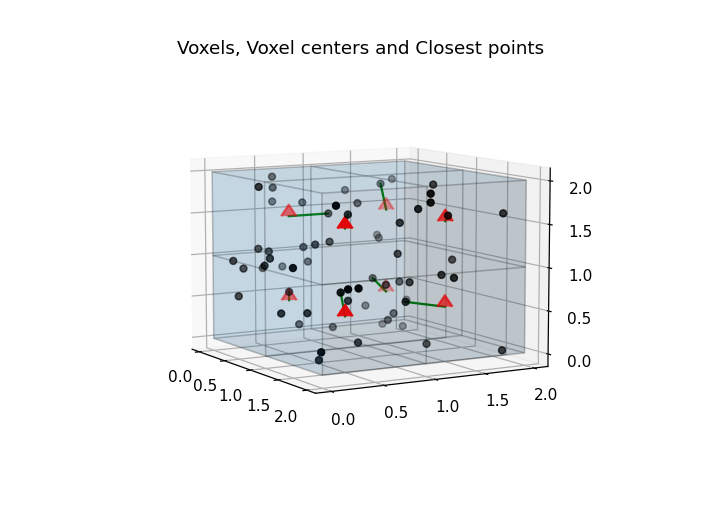

Text(0.5, 0.92, 'Voxels, Voxel centers and Closest points')

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(one, alpha = 0.12, edgecolor="k", shade=True)
ax.scatter(x.ravel(), y.ravel(), z.ravel(), c = 'k')
ax.scatter(xc_.ravel(), yc_.ravel(), zc_.ravel(), marker = 10, c = 'r', s = 100)


tree = cKDTree(np.c_[x.ravel(), y.ravel(), z.ravel()])
dd, ii = tree.query(np.c_[xc_.ravel(), yc_.ravel(), zc_.ravel()], k=1)

x_close = x.ravel()[ii]
y_close = y.ravel()[ii]
z_close = z.ravel()[ii]

for i in range(len(ii)):
    ax.plot3D([xc_.ravel()[i], x.ravel()[ii[i]]], [yc_.ravel()[i], y.ravel()[ii[i]]], [zc_.ravel()[i], z.ravel()[ii[i]]], c='g')
ax.set_title('Voxels, Voxel centers and Closest points')